In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import urllib.request

In [2]:
# counrty data from johns hopkins
url = 'https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv'
urllib.request.urlretrieve(url, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x7fc4453b72d0>)

In [3]:
#state data from new york times
url_states = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
urllib.request.urlretrieve(url_states, '/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv')

('/Users/pauldesalvo/Documents/jupyter_notebooks/COVID-19/covid_datasets/us-states.csv',
 <http.client.HTTPMessage at 0x7fc4453d21d0>)

In [4]:
countries_df = pd.read_csv('covid_datasets/time_series_covid19_confirmed_global.csv')

In [163]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
countries_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,5.619545e+04,5.724988e+04,5.831288e+04,5.936989e+04,6.033058e+04,6.110163e+04,6.198372e+04,6.293235e+04,6.401938e+04,6.502082e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,2.906567e+05,2.969408e+05,3.029832e+05,3.091674e+05,3.148280e+05,3.191810e+05,3.235822e+05,3.290138e+05,3.354734e+05,3.414892e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.495000e+02,2.502500e+02,2.565000e+02,2.565000e+02,2.635000e+02,2.637500e+02,2.667500e+02,2.667500e+02,2.667500e+02,2.715000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.658000e+03,1.689500e+03,1.702000e+03,1.711500e+03,1.723000e+03,1.779000e+03,1.813000e+03,1.821500e+03,1.833000e+03,1.845000e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.447925e+04,1.478700e+04,1.545100e+04,1.601425e+04,1.635575e+04,1.643000e+04,1.682950e+04,1.702700e+04,1.723075e+04,1.771675e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.899211e+06,3.970121e+06,4.038816e+06,4.112531e+06,4.178970e+06,4.233923e+06,4.290337e+06,4.356206e+06,4.426982e+06,4.494601e+06


In [8]:
countries_df['7 day change'] = countries_df.iloc[:,-1] / (countries_df.iloc[:,len(countries_df.columns) - 7]) -1

In [68]:
countries_df['Rank'] = countries_df.iloc[:,-3].rank(ascending = False)

In [69]:
countries_df
#countries_df.iloc[:,-3]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7 day change,Rank
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,35928,35981,36036,36157,36263,36368,36471,36542,0.015592,52.0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4466,4570,4637,4763,4880,4997,5105,5197,0.137199,99.0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,25484,26159,26764,27357,27973,28615,29229,29831,0.140372,58.0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,889,897,897,897,907,907,918,922,0.027871,163.0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,851,880,916,932,950,1000,1078,1109,0.260227,152.0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,76,82,82,82,86,86,91,91,0.109756,230.0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,148027,153520,158334,162526,167416,173355,178996,185373,0.207484,20.0
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,36162,36613,36996,37317,37390,37629,37937,38196,0.043236,51.0
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,0.000000,226.0
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3640,3654,3668,3685,3699,3718,3736,3756,0.027915,107.0


In [78]:
#countries_df

In [79]:
date_column = list(countries_df.columns)[4:-2]

In [80]:
#pd.set_option('display.max_rows', 500)

#countries_df.dtypes

In [81]:
#use the diff to turn the cumulative data into new daily cases
diff_df = countries_df.iloc[:,4:-2].diff(axis=1)

In [82]:
#diff_df

In [83]:
#Select countries only and the 7 day change column
countries_only_df = countries_df.iloc[:, np.r_[:4,-2,-1]]

In [84]:
#countries_only_df

In [85]:
#.sort_values(by=countries_df.columns[-1], ascending=False)

In [86]:
merge1 = pd.concat([countries_only_df,diff_df], axis = 1, join = 'inner')

In [87]:
country_new_daily_cases = merge1.sort_values(by=merge1.columns[-1], ascending = False)

In [88]:
top_20_countries = country_new_daily_cases[:20]

In [89]:
df_new = pd.melt(frame=top_20_countries, id_vars=['Country/Region','Lat','Long','7 day change','Rank'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [90]:
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%m/%d/%y') 

In [91]:

df_new['Country (7 day change)']= df_new["Country/Region"] + ' (' + (round((df_new["7 day change"]*100),1)).map(str) + '%)' + " (Rank "+df_new["Rank"].astype(int).map(str) + ')'

In [92]:
df_new.head(5000)

,Country/Region,Lat,Long,7 day change,Rank,Date,Number of Cases,Country (7 day change)
0,US,40.000000,-100.000000,0.092904,1.0,2020-01-22,NaN,US (9.3%) (Rank 1)
1,Brazil,-14.235000,-51.925300,0.113826,2.0,2020-01-22,NaN,Brazil (11.4%) (Rank 2)
2,India,20.593684,78.962880,0.222675,3.0,2020-01-22,NaN,India (22.3%) (Rank 3)
3,South Africa,-30.559500,22.937500,0.142591,5.0,2020-01-22,NaN,South Africa (14.3%) (Rank 5)
4,Mexico,23.634500,-102.552800,0.100173,6.0,2020-01-22,NaN,Mexico (10.0%) (Rank 6)
...,...,...,...,...,...,...,...,...
3815,Dominican Republic,18.735700,-70.162700,0.149601,35.0,2020-07-30,1733.0,Dominican Republic (15.0%) (Rank 35)
3816,Bolivia,-16.290200,-63.588700,0.132087,30.0,2020-07-30,1700.0,Bolivia (13.2%) (Rank 30)
3817,Saudi Arabia,23.885942,45.079162,0.043562,14.0,2020-07-30,1629.0,Saudi Arabia (4.4%) (Rank 14)
3818,Kazakhstan,48.019600,66.923700,0.110338,25.0,2020-07-30,1414.0,Kazakhstan (11.0%) (Rank 25)


In [25]:
#total_cases_by_country = (df_new[df_new.Date == df_new.Date.max()].sort_values('Number of Cases', ascending = False)) 

In [26]:
#total_cases_by_country.reset_index()

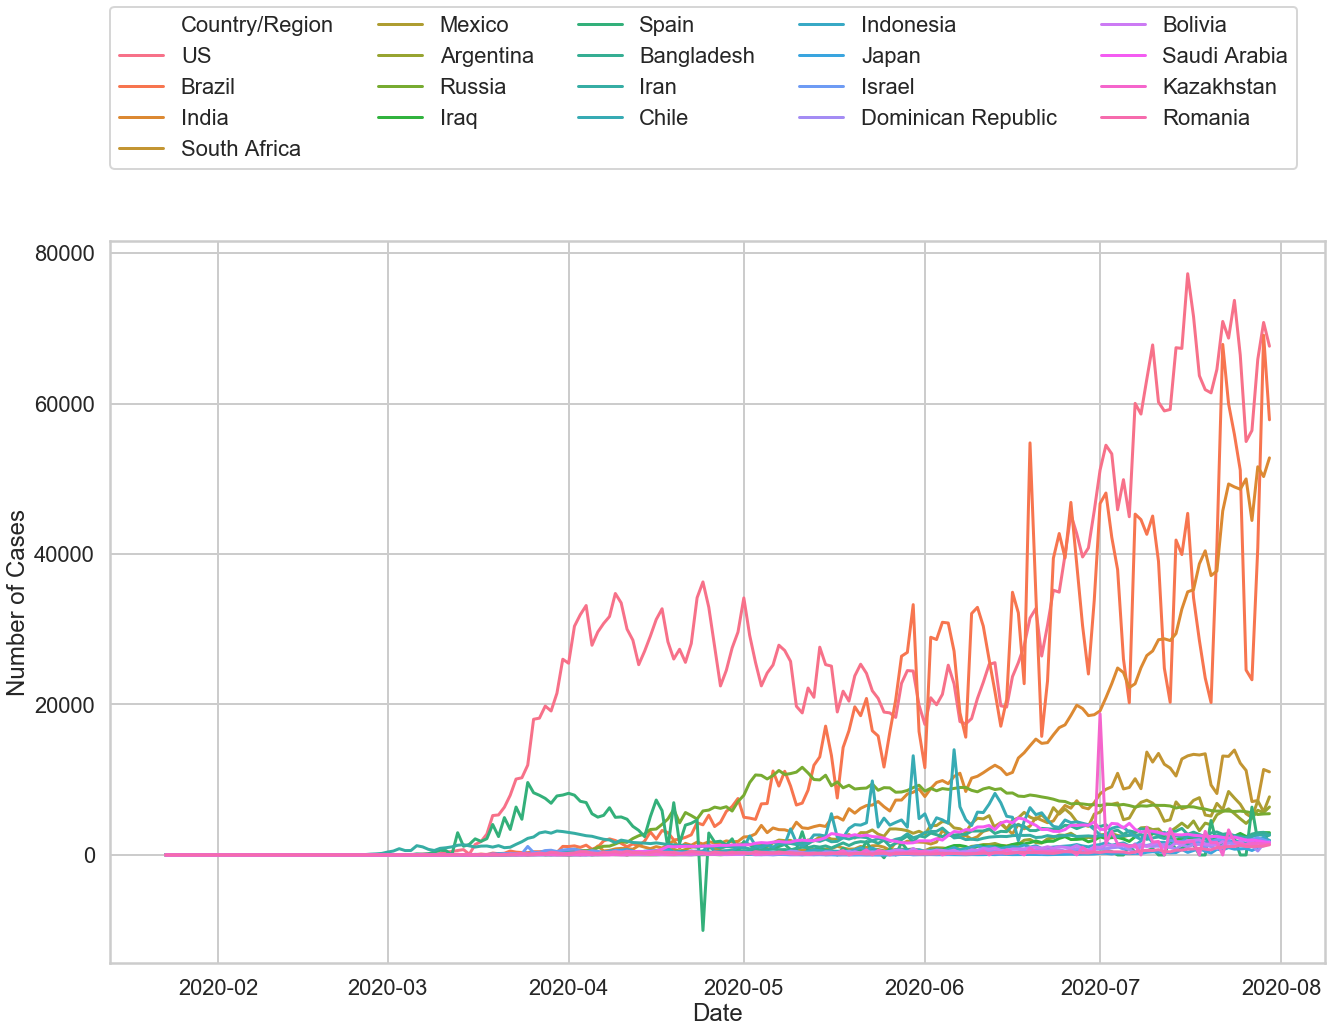

In [56]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = df_new, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = df_new[df_new.Date == df_new.Date.max()]


#for index, row in filt.iterrows():
#ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
#            xycoords='data')

plt.tight_layout()
plt.savefig('new_daily_cases.png')
plt.show()

# Rolling Average

In [28]:
#now we can find the rolling average
rolling_avg_df = diff_df.rolling(window=7, axis = 1).mean()

In [29]:
merge2 = pd.concat([countries_only_df,rolling_avg_df], axis = 1, join = 'inner')

In [30]:
country_new_daily_cases_rolling_avg = merge2.sort_values(by=merge2.columns[-1], ascending = False)

In [31]:
top_20_countries_roll = country_new_daily_cases_rolling_avg[:20]

In [32]:
countries_rolling_average = pd.melt(frame=top_20_countries_roll, id_vars=['Country/Region','Lat','Long'], value_vars=date_column,  value_name="Number of Cases", var_name="Date")

In [33]:
countries_rolling_average['Date'] = pd.to_datetime(countries_rolling_average['Date'], format='%m/%d/%y') 

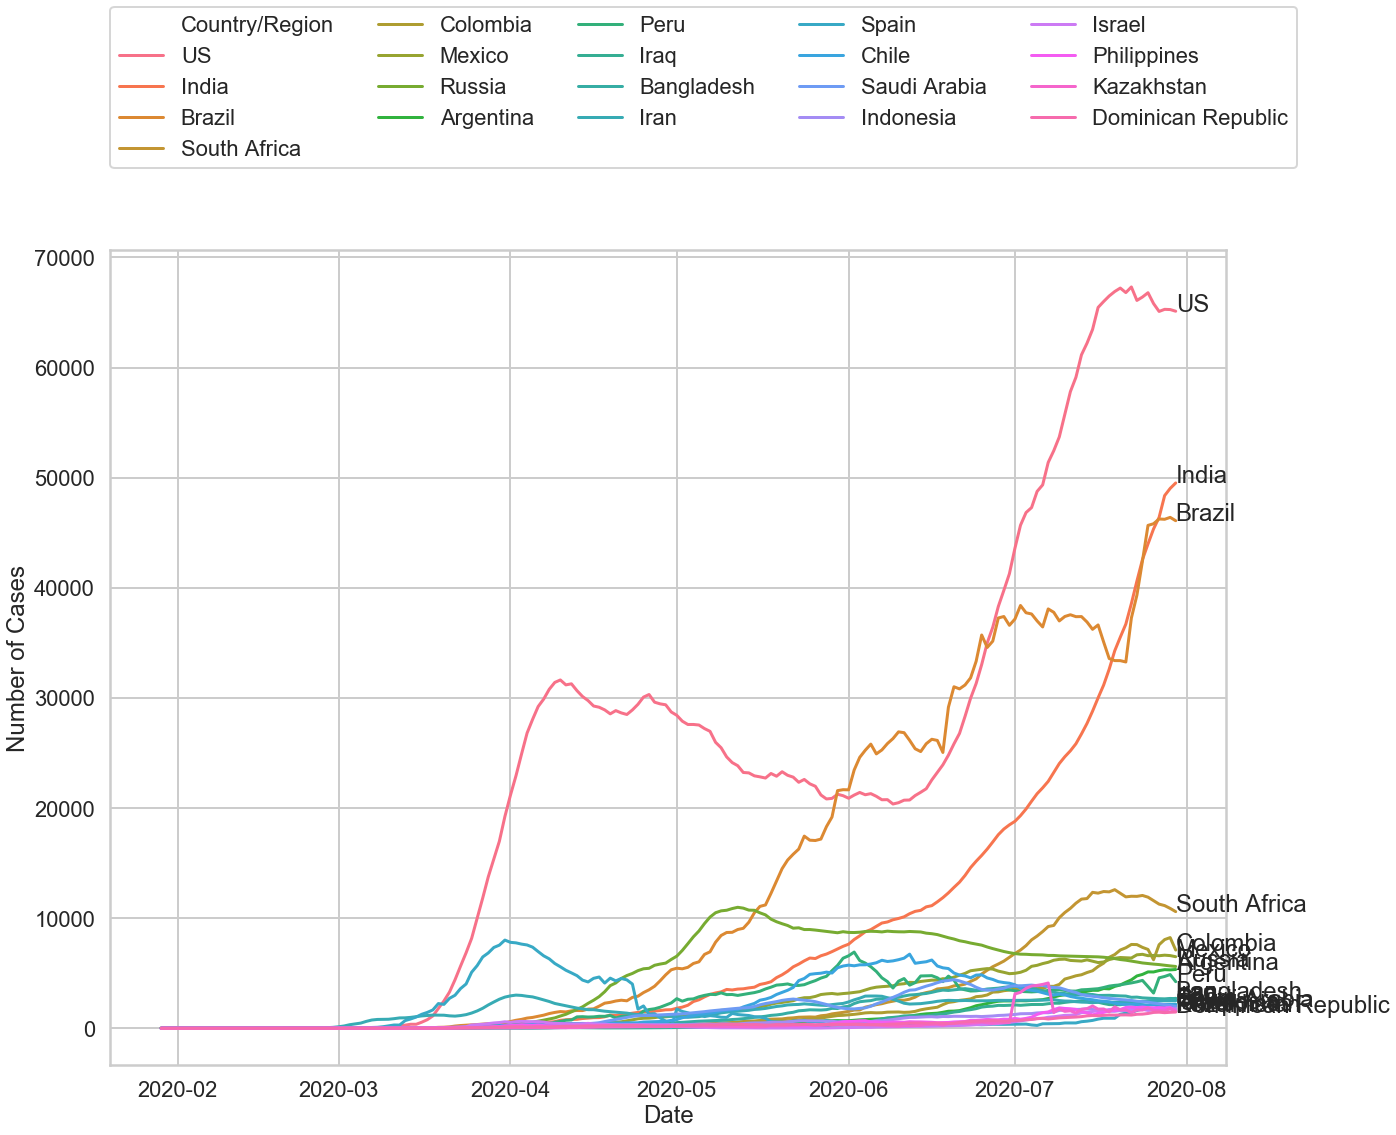

In [34]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,15))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')
plt.legend(ncol = 5,loc = (0,1.1))

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

filt = countries_rolling_average[df_new.Date == df_new.Date.max()]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

plt.show()

In [35]:
filt[:3]

,Country/Region,Lat,Long,Date,Number of Cases
3800,US,40.000000,-100.00000,2020-07-30,65112.142857
3801,India,20.593684,78.96288,2020-07-30,49519.714286
3802,Brazil,-14.235000,-51.92530,2020-07-30,46089.571429


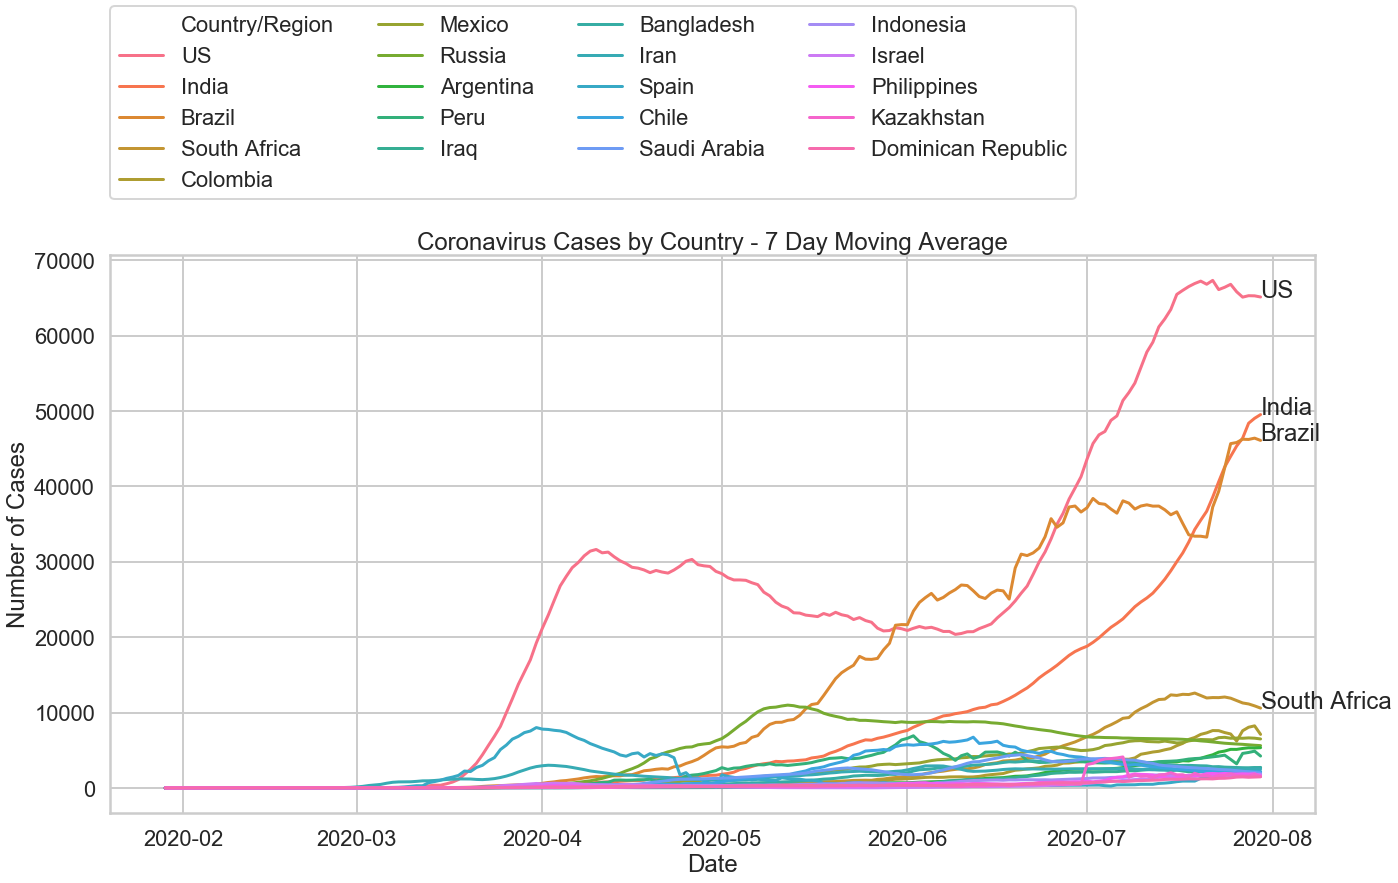

In [58]:
# get a closer look at the lower countries
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = countries_rolling_average, x='Date', y='Number of Cases', hue = 'Country/Region')

#ax.set_yticks(range(0,8000,1000))
#plt.ylim(0,10000)
#plt.margins(y=12000)

plt.legend(ncol = 4,loc = (0,1.1))
plt.title('Coronavirus Cases by Country - 7 Day Moving Average')

xmax= df_new['Date'].max()

#ax.annotate('US', xy=(xmax, 70000),  
#            xycoords='data'
            #,xytext=(0.8, 0.95), 
            #textcoords='axes fraction',
            #arrowprops=dict(facecolor='black', 
            #shrink=0.05),
            #horizontalalignment='right', 
            #verticalalignment='top',
#            )

#return only the first 4 countries labels becasue the rest just overlap
filt = countries_rolling_average[df_new.Date == df_new.Date.max()][:4]

for index, row in filt.iterrows():
    ax.annotate(row['Country/Region'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

f.tight_layout()
plt.savefig('covid_cases_by_country.png')
plt.show()


# Country by Country Data

In [93]:
#fig, axes = plt.subplots(25,1, figsize=(15,150))
#for (year, group), ax in zip(countries_rolling_average.groupby('Country/Region'), axes.flatten()):
#    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
#fig.tight_layout()

# Sorting by biggest Change

In [94]:
df_sorted = df_new.sort_values(by = '7 day change', ascending = False)

In [95]:
df_sorted.reset_index()

,index,Country/Region,Lat,Long,7 day change,Rank,Date,Number of Cases,Country (7 day change)
0,2022,India,20.593684,78.96288,0.222675,3.0,2020-05-02,2442.0,India (22.3%) (Rank 3)
1,1802,India,20.593684,78.96288,0.222675,3.0,2020-04-21,1541.0,India (22.3%) (Rank 3)
2,3282,India,20.593684,78.96288,0.222675,3.0,2020-07-04,24850.0,India (22.3%) (Rank 3)
3,1942,India,20.593684,78.96288,0.222675,3.0,2020-04-28,1873.0,India (22.3%) (Rank 3)
4,162,India,20.593684,78.96288,0.222675,3.0,2020-01-30,1.0,India (22.3%) (Rank 3)
...,...,...,...,...,...,...,...,...,...
3815,1971,Chile,-35.675100,-71.54300,0.035839,8.0,2020-04-29,520.0,Chile (3.6%) (Rank 8)
3816,1071,Chile,-35.675100,-71.54300,0.035839,8.0,2020-03-15,13.0,Chile (3.6%) (Rank 8)
3817,1091,Chile,-35.675100,-71.54300,0.035839,8.0,2020-03-16,81.0,Chile (3.6%) (Rank 8)
3818,3271,Chile,-35.675100,-71.54300,0.035839,8.0,2020-07-03,3548.0,Chile (3.6%) (Rank 8)


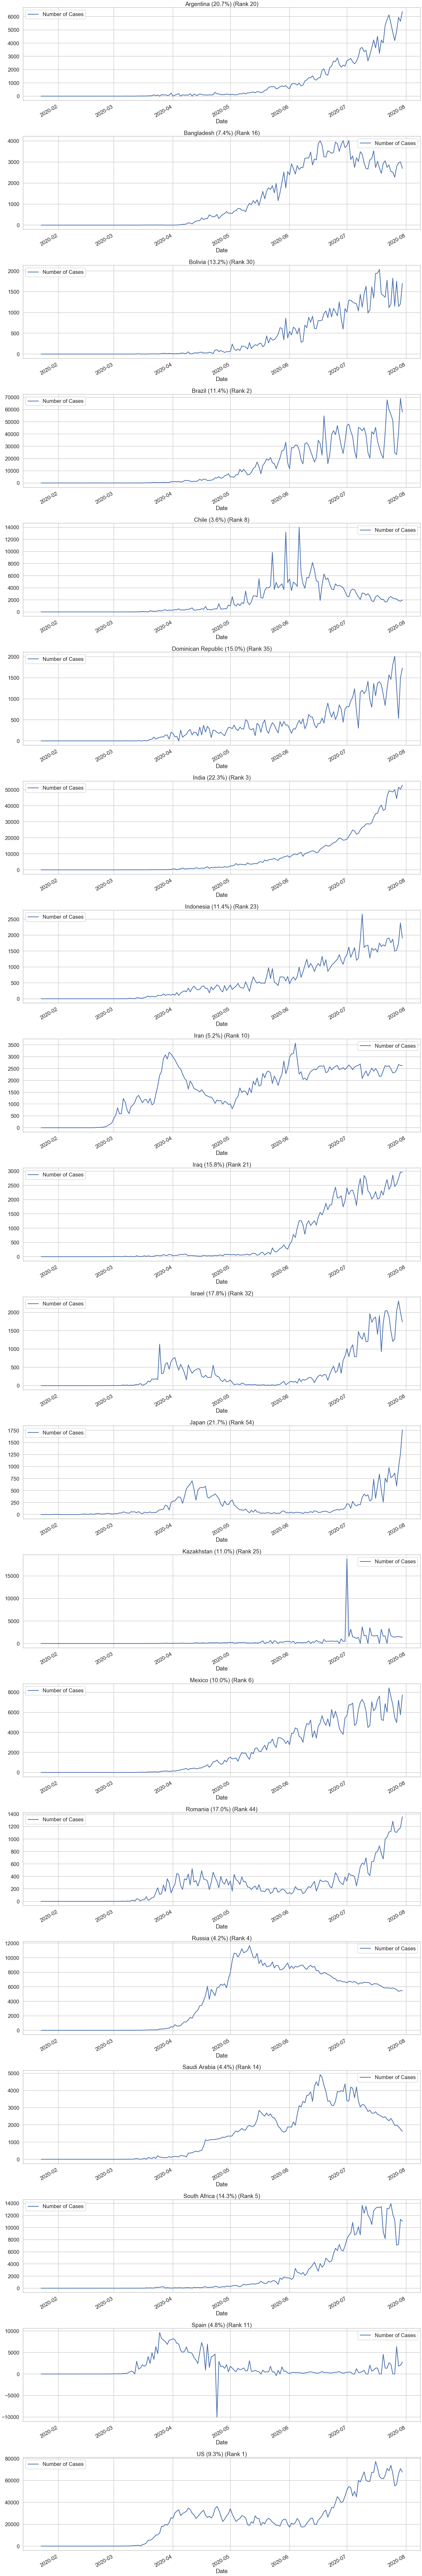

In [107]:
fig, axes = plt.subplots(20,1, figsize=(25,150))
sns.set_context("poster", font_scale = 1)
for (year, group), ax in zip(df_sorted.groupby('Country (7 day change)'), axes.flatten()):
    group.plot(x='Date', y='Number of Cases', kind='line', ax=ax, title=year)
    
fig.tight_layout()
plt.savefig('cases_by_country_individual.png')

# Silly Video

In [108]:
video_df = countries_df[countries_df['Province/State'].isna()]

In [113]:
#video_df

In [111]:
video_df = video_df.iloc[:, np.r_[1,4:len(video_df.columns)-1]]

In [114]:
video_df = video_df.fillna(0)

In [115]:
video_df = video_df.set_index('Country/Region')


In [116]:
transposed_df = video_df.transpose()

In [118]:
transposed_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,Burundi,Sierra Leone,Malawi,South Sudan,Western Sahara,Sao Tome and Principe,Yemen,Comoros,Tajikistan,Lesotho
1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/27/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/28/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/30/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1/31/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
import bar_chart_race as bcr
df = transposed_df
bcr.bar_chart_race(
    df=df,
    filename='covid19_horiz.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%B %d, %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='COVID-19 Deaths by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/pauldesalvo/opt/anaconda3/lib/python3.

# States

In [164]:
states_df = pd.read_csv('covid_datasets/us-states.csv')

In [249]:
states_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
8259,2020-07-30,Virginia,51,88904,2141
8260,2020-07-30,Washington,53,58100,1653
8261,2020-07-30,West Virginia,54,6422,115
8262,2020-07-30,Wisconsin,55,56111,928


In [50]:
#states_df['date'] = pd.to_datetime(df_new['Date'], format='%Y-%m/%d') 

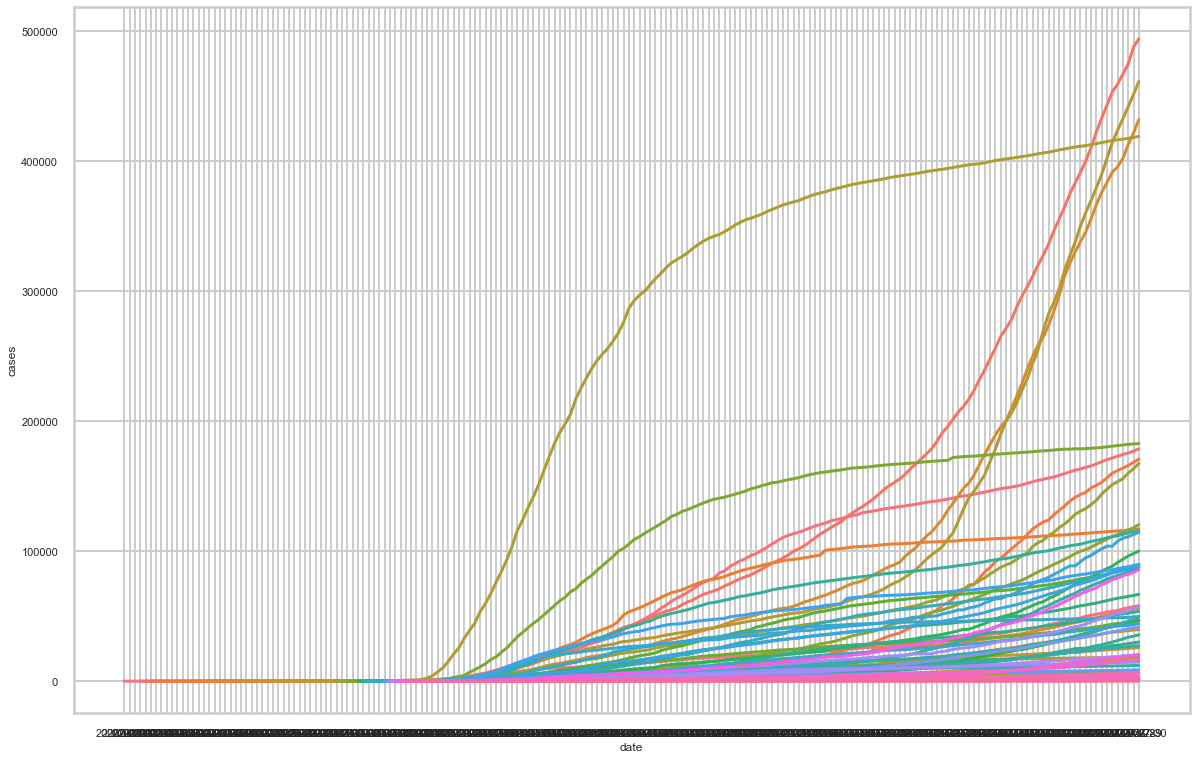

In [251]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.5)
f, ax = plt.subplots(figsize=(20,13))

sns.lineplot(data = states_df, x='date', y='cases', hue = 'state')
ax.get_legend().remove()

In [166]:
states_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [174]:
states_pivoted = pd.pivot_table(states_df, values='cases', index='state',columns='date', aggfunc=np.sum, fill_value=0)

In [256]:
states_pivoted

date,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30
state,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,70358,71813,74212,76005,78130,79294,81115,82366,83782,85762
Alaska,0,0,0,0,0,0,0,0,0,0,...,2523,2617,2682,2746,2866,3100,3204,3348,3440,3557
Arizona,0,0,0,0,0,1,1,1,1,1,...,148730,150659,153029,156392,160055,162041,163918,165994,168361,170905
Arkansas,0,0,0,0,0,0,0,0,0,0,...,34655,35246,36259,37249,37981,38623,39447,40181,40968,41759
California,0,0,0,0,1,2,2,2,2,2,...,410366,422528,433175,443096,453327,459338,467103,474951,487855,494269
Colorado,0,0,0,0,0,0,0,0,0,0,...,41152,41747,42409,43098,43847,44364,44723,45420,45885,46338
Connecticut,0,0,0,0,0,0,0,0,0,0,...,48096,48223,48232,48776,48776,48776,48983,49077,49540,49670
Delaware,0,0,0,0,0,0,0,0,0,0,...,13746,13792,13924,14202,14175,14290,14406,14476,14602,14689
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,11427,11529,11571,11649,11717,11780,11858,11945,11999,12057


In [181]:
states_diff_df = states_pivoted.diff(axis=1)

In [185]:
states_rolling_df = states_diff_df.rolling(window=7, axis = 1).mean()

In [186]:
states_rolling_df = states_rolling_df.reset_index()

In [189]:
states_rolling_df.columns[1:]

Index(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
       ...
       '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
       '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30'],
      dtype='object', name='date', length=192)

In [191]:
new_states_rolling_df = pd.melt(frame = states_rolling_df.reset_index(), id_vars='state', value_vars=states_rolling_df.columns[1:],  value_name="Number of Cases", var_name="Date")

In [203]:
new_states_rolling_df['Date'] = pd.to_datetime(new_states_rolling_df['Date'], format='%Y-%m-%d') 

In [244]:
# see the highest number of cases for each state
state_worst_day = new_states_rolling_df.loc[new_states_rolling_df.reset_index().groupby(['state'])['Number of Cases'].idxmax()].sort_values(by="Number of Cases", ascending=False)
state_worst_day

,state,Date,Number of Cases
9799,Florida,2020-07-17,11870.000000
9946,Texas,2020-07-19,10460.714286
10234,California,2020-07-25,10019.000000
4433,New York,2020-04-10,9877.285714
9187,Arizona,2020-07-06,3848.571429
4266,New Jersey,2020-04-07,3674.285714
10460,Georgia,2020-07-29,3489.571429
5734,Illinois,2020-05-04,2565.285714
5467,Massachusetts,2020-04-29,2474.428571
10440,Tennessee,2020-07-28,2327.428571


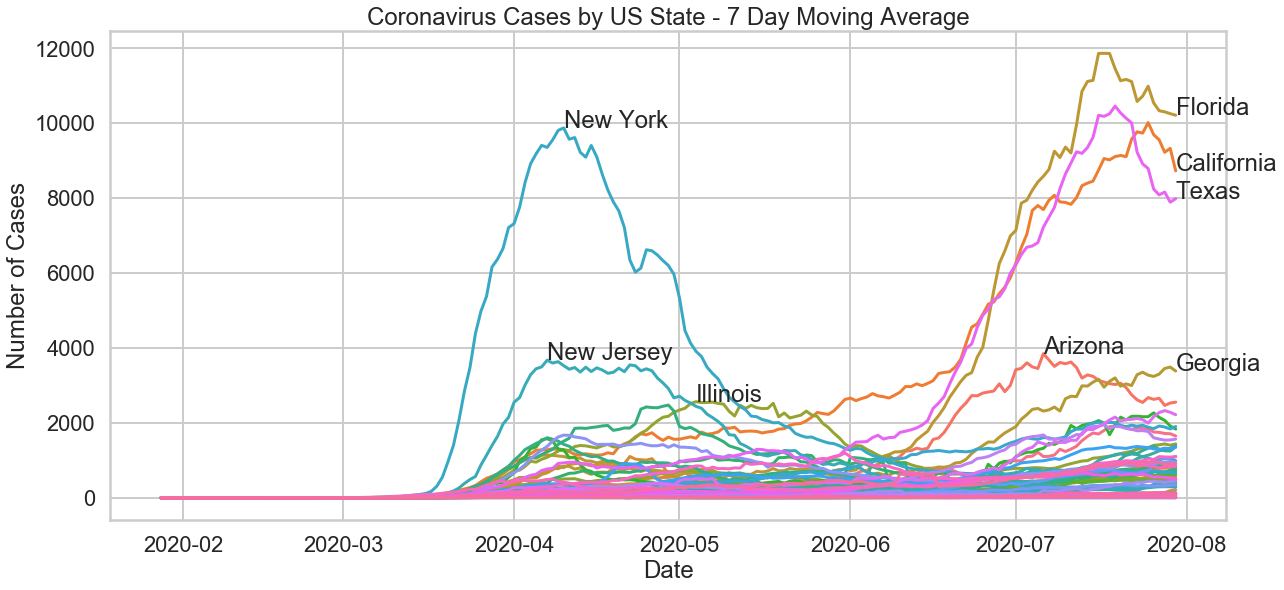

In [248]:
sns.set()

sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1)
f, ax = plt.subplots(figsize=(20,9))

sns.lineplot(data = new_states_rolling_df, x='Date', y='Number of Cases', hue = 'state')

#plt.legend(ncol = 5,loc = (0,1.1))
plt.title('Coronavirus Cases by US State - 7 Day Moving Average')

date_filter = new_states_rolling_df['Date'] == new_states_rolling_df['Date'].max()
state_labels = new_states_rolling_df.loc[date_filter].sort_values(by="Number of Cases", ascending = False)[:4]

#Top 4 States
for index, row in state_labels.iterrows():
    ax.annotate(row['state'], xy=(row['Date'], row['Number of Cases']),  
            xycoords='data')

#Add Data Labels for specific states with select states with a spike in cases
select_states = ["New York", "New Jersey", "Arizona", "Illinois"]
for i in select_states:
    ax.annotate(i, xy=(state_worst_day.loc[state_worst_day['state'] == i]['Date'],state_worst_day.loc[state_worst_day['state'] == i]['Number of Cases']))
#ax.annotate("New Jersey", xy=(state_worst_day.loc[state_worst_day['state'] == 'New Jersey']['Date'],state_worst_day.loc[state_worst_day['state'] == 'New Jersey']['Number of Cases']))
ax.get_legend().remove()

    
#f.tight_layout()
plt.savefig('covid_cases_by_state.png')
plt.show()


In [194]:
filt

,state,Date,Number of Cases


# Quick Testing

In [52]:
test_df = countries_df[['7/17/20','7/18/20','7/19/20','7/20/20','7/21/20','7/22/20']]

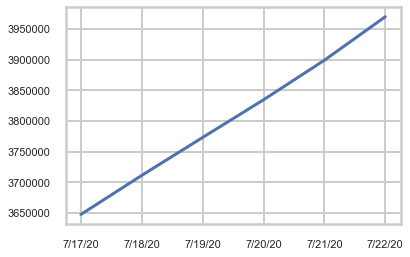

In [53]:
test_df.iloc[225].plot()